## [ 과제 1] : CBOW 신경망 모델 구현

In [1]:
from mynlp import preprocess, create_contexts_target, convert_one_hot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nn_layers import  MatMul, SoftmaxWithLoss,Adam,SGD,Trainer

In [3]:
# 다중 분류 모델 : Softmax 사용
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size): # 어휘 수 : 14개, 은닉 층의 뉴런수 : 5
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def predict(self,contexts):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        return self.loss_layer.softmax(score) # softmax로 변화
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

# text = "The black cat ran so fast that the white mouse could not run away."
text = "Sawyer also appears in at least three unfinished Twain works, \
        Huck and Tom Among the Indians, Schoolhouse Hill and Tom Sawyer's Conspiracy.\
        While all three uncompleted works were posthumously published, \
        only Tom Sawyer's Conspiracy has a complete plot, as Twain abandoned \
        the other two works after finishing only a few chapters."
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 27 | 시간 0[s] | 손실 3.74
| 에폭 1 |  반복 21 / 27 | 시간 0[s] | 손실 3.74
| 에폭 2 |  반복 1 / 27 | 시간 0[s] | 손실 3.74
| 에폭 2 |  반복 21 / 27 | 시간 0[s] | 손실 3.73
| 에폭 3 |  반복 1 / 27 | 시간 0[s] | 손실 3.73
| 에폭 3 |  반복 21 / 27 | 시간 0[s] | 손실 3.73
| 에폭 4 |  반복 1 / 27 | 시간 0[s] | 손실 3.72
| 에폭 4 |  반복 21 / 27 | 시간 0[s] | 손실 3.71
| 에폭 5 |  반복 1 / 27 | 시간 0[s] | 손실 3.71
| 에폭 5 |  반복 21 / 27 | 시간 0[s] | 손실 3.69
| 에폭 6 |  반복 1 / 27 | 시간 0[s] | 손실 3.67
| 에폭 6 |  반복 21 / 27 | 시간 0[s] | 손실 3.67
| 에폭 7 |  반복 1 / 27 | 시간 0[s] | 손실 3.62
| 에폭 7 |  반복 21 / 27 | 시간 0[s] | 손실 3.64
| 에폭 8 |  반복 1 / 27 | 시간 0[s] | 손실 3.56
| 에폭 8 |  반복 21 / 27 | 시간 0[s] | 손실 3.59
| 에폭 9 |  반복 1 / 27 | 시간 0[s] | 손실 3.57
| 에폭 9 |  반복 21 / 27 | 시간 0[s] | 손실 3.52
| 에폭 10 |  반복 1 / 27 | 시간 0[s] | 손실 3.48
| 에폭 10 |  반복 21 / 27 | 시간 0[s] | 손실 3.48
| 에폭 11 |  반복 1 / 27 | 시간 0[s] | 손실 3.49
| 에폭 11 |  반복 21 / 27 | 시간 0[s] | 손실 3.40
| 에폭 12 |  반복 1 / 27 | 시간 0[s] | 손실 3.42
| 에폭 12 |  반복 21 / 27 | 시간 0[s] | 손실 3.36
| 에폭 13 |  반복 1 / 27 |

| 에폭 109 |  반복 21 / 27 | 시간 0[s] | 손실 1.43
| 에폭 110 |  반복 1 / 27 | 시간 0[s] | 손실 1.43
| 에폭 110 |  반복 21 / 27 | 시간 0[s] | 손실 1.51
| 에폭 111 |  반복 1 / 27 | 시간 0[s] | 손실 1.34
| 에폭 111 |  반복 21 / 27 | 시간 0[s] | 손실 1.43
| 에폭 112 |  반복 1 / 27 | 시간 0[s] | 손실 1.54
| 에폭 112 |  반복 21 / 27 | 시간 0[s] | 손실 1.35
| 에폭 113 |  반복 1 / 27 | 시간 0[s] | 손실 1.47
| 에폭 113 |  반복 21 / 27 | 시간 0[s] | 손실 1.43
| 에폭 114 |  반복 1 / 27 | 시간 0[s] | 손실 1.61
| 에폭 114 |  반복 21 / 27 | 시간 0[s] | 손실 1.42
| 에폭 115 |  반복 1 / 27 | 시간 0[s] | 손실 1.37
| 에폭 115 |  반복 21 / 27 | 시간 0[s] | 손실 1.44
| 에폭 116 |  반복 1 / 27 | 시간 0[s] | 손실 1.30
| 에폭 116 |  반복 21 / 27 | 시간 1[s] | 손실 1.50
| 에폭 117 |  반복 1 / 27 | 시간 1[s] | 손실 1.32
| 에폭 117 |  반복 21 / 27 | 시간 1[s] | 손실 1.45
| 에폭 118 |  반복 1 / 27 | 시간 1[s] | 손실 1.28
| 에폭 118 |  반복 21 / 27 | 시간 1[s] | 손실 1.45
| 에폭 119 |  반복 1 / 27 | 시간 1[s] | 손실 1.54
| 에폭 119 |  반복 21 / 27 | 시간 1[s] | 손실 1.27
| 에폭 120 |  반복 1 / 27 | 시간 1[s] | 손실 1.52
| 에폭 120 |  반복 21 / 27 | 시간 1[s] | 손실 1.37
| 에폭 121 |  반복 1 / 27 

| 에폭 216 |  반복 1 / 27 | 시간 1[s] | 손실 0.82
| 에폭 216 |  반복 21 / 27 | 시간 1[s] | 손실 0.89
| 에폭 217 |  반복 1 / 27 | 시간 1[s] | 손실 0.84
| 에폭 217 |  반복 21 / 27 | 시간 1[s] | 손실 0.79
| 에폭 218 |  반복 1 / 27 | 시간 1[s] | 손실 1.13
| 에폭 218 |  반복 21 / 27 | 시간 1[s] | 손실 0.92
| 에폭 219 |  반복 1 / 27 | 시간 1[s] | 손실 0.70
| 에폭 219 |  반복 21 / 27 | 시간 1[s] | 손실 0.76
| 에폭 220 |  반복 1 / 27 | 시간 1[s] | 손실 1.07
| 에폭 220 |  반복 21 / 27 | 시간 1[s] | 손실 0.85
| 에폭 221 |  반복 1 / 27 | 시간 1[s] | 손실 1.10
| 에폭 221 |  반복 21 / 27 | 시간 1[s] | 손실 0.87
| 에폭 222 |  반복 1 / 27 | 시간 1[s] | 손실 0.67
| 에폭 222 |  반복 21 / 27 | 시간 1[s] | 손실 0.80
| 에폭 223 |  반복 1 / 27 | 시간 1[s] | 손실 0.87
| 에폭 223 |  반복 21 / 27 | 시간 1[s] | 손실 0.86
| 에폭 224 |  반복 1 / 27 | 시간 1[s] | 손실 0.98
| 에폭 224 |  반복 21 / 27 | 시간 1[s] | 손실 0.78
| 에폭 225 |  반복 1 / 27 | 시간 1[s] | 손실 0.72
| 에폭 225 |  반복 21 / 27 | 시간 1[s] | 손실 0.85
| 에폭 226 |  반복 1 / 27 | 시간 1[s] | 손실 0.79
| 에폭 226 |  반복 21 / 27 | 시간 1[s] | 손실 0.89
| 에폭 227 |  반복 1 / 27 | 시간 1[s] | 손실 0.70
| 에폭 227 |  반복 21 / 27 

| 에폭 335 |  반복 1 / 27 | 시간 2[s] | 손실 0.42
| 에폭 335 |  반복 21 / 27 | 시간 2[s] | 손실 0.34
| 에폭 336 |  반복 1 / 27 | 시간 2[s] | 손실 0.52
| 에폭 336 |  반복 21 / 27 | 시간 2[s] | 손실 0.42
| 에폭 337 |  반복 1 / 27 | 시간 2[s] | 손실 0.43
| 에폭 337 |  반복 21 / 27 | 시간 2[s] | 손실 0.46
| 에폭 338 |  반복 1 / 27 | 시간 2[s] | 손실 0.29
| 에폭 338 |  반복 21 / 27 | 시간 2[s] | 손실 0.44
| 에폭 339 |  반복 1 / 27 | 시간 2[s] | 손실 0.37
| 에폭 339 |  반복 21 / 27 | 시간 2[s] | 손실 0.38
| 에폭 340 |  반복 1 / 27 | 시간 2[s] | 손실 0.38
| 에폭 340 |  반복 21 / 27 | 시간 2[s] | 손실 0.45
| 에폭 341 |  반복 1 / 27 | 시간 2[s] | 손실 0.18
| 에폭 341 |  반복 21 / 27 | 시간 2[s] | 손실 0.42
| 에폭 342 |  반복 1 / 27 | 시간 2[s] | 손실 0.35
| 에폭 342 |  반복 21 / 27 | 시간 2[s] | 손실 0.41
| 에폭 343 |  반복 1 / 27 | 시간 2[s] | 손실 0.40
| 에폭 343 |  반복 21 / 27 | 시간 2[s] | 손실 0.38
| 에폭 344 |  반복 1 / 27 | 시간 2[s] | 손실 0.49
| 에폭 344 |  반복 21 / 27 | 시간 2[s] | 손실 0.34
| 에폭 345 |  반복 1 / 27 | 시간 2[s] | 손실 0.48
| 에폭 345 |  반복 21 / 27 | 시간 2[s] | 손실 0.38
| 에폭 346 |  반복 1 / 27 | 시간 2[s] | 손실 0.58
| 에폭 346 |  반복 21 / 27 

| 에폭 455 |  반복 21 / 27 | 시간 3[s] | 손실 0.20
| 에폭 456 |  반복 1 / 27 | 시간 3[s] | 손실 0.15
| 에폭 456 |  반복 21 / 27 | 시간 3[s] | 손실 0.17
| 에폭 457 |  반복 1 / 27 | 시간 3[s] | 손실 0.20
| 에폭 457 |  반복 21 / 27 | 시간 3[s] | 손실 0.18
| 에폭 458 |  반복 1 / 27 | 시간 3[s] | 손실 0.25
| 에폭 458 |  반복 21 / 27 | 시간 3[s] | 손실 0.17
| 에폭 459 |  반복 1 / 27 | 시간 3[s] | 손실 0.15
| 에폭 459 |  반복 21 / 27 | 시간 3[s] | 손실 0.18
| 에폭 460 |  반복 1 / 27 | 시간 3[s] | 손실 0.18
| 에폭 460 |  반복 21 / 27 | 시간 3[s] | 손실 0.19
| 에폭 461 |  반복 1 / 27 | 시간 3[s] | 손실 0.16
| 에폭 461 |  반복 21 / 27 | 시간 3[s] | 손실 0.15
| 에폭 462 |  반복 1 / 27 | 시간 3[s] | 손실 0.20
| 에폭 462 |  반복 21 / 27 | 시간 3[s] | 손실 0.21
| 에폭 463 |  반복 1 / 27 | 시간 3[s] | 손실 0.08
| 에폭 463 |  반복 21 / 27 | 시간 3[s] | 손실 0.19
| 에폭 464 |  반복 1 / 27 | 시간 3[s] | 손실 0.09
| 에폭 464 |  반복 21 / 27 | 시간 3[s] | 손실 0.18
| 에폭 465 |  반복 1 / 27 | 시간 3[s] | 손실 0.17
| 에폭 465 |  반복 21 / 27 | 시간 3[s] | 손실 0.15
| 에폭 466 |  반복 1 / 27 | 시간 3[s] | 손실 0.22
| 에폭 466 |  반복 21 / 27 | 시간 3[s] | 손실 0.18
| 에폭 467 |  반복 1 / 27 

| 에폭 570 |  반복 21 / 27 | 시간 4[s] | 손실 0.10
| 에폭 571 |  반복 1 / 27 | 시간 4[s] | 손실 0.05
| 에폭 571 |  반복 21 / 27 | 시간 4[s] | 손실 0.07
| 에폭 572 |  반복 1 / 27 | 시간 4[s] | 손실 0.15
| 에폭 572 |  반복 21 / 27 | 시간 4[s] | 손실 0.07
| 에폭 573 |  반복 1 / 27 | 시간 4[s] | 손실 0.10
| 에폭 573 |  반복 21 / 27 | 시간 4[s] | 손실 0.07
| 에폭 574 |  반복 1 / 27 | 시간 4[s] | 손실 0.15
| 에폭 574 |  반복 21 / 27 | 시간 4[s] | 손실 0.07
| 에폭 575 |  반복 1 / 27 | 시간 4[s] | 손실 0.07
| 에폭 575 |  반복 21 / 27 | 시간 4[s] | 손실 0.09
| 에폭 576 |  반복 1 / 27 | 시간 4[s] | 손실 0.05
| 에폭 576 |  반복 21 / 27 | 시간 4[s] | 손실 0.07
| 에폭 577 |  반복 1 / 27 | 시간 4[s] | 손실 0.12
| 에폭 577 |  반복 21 / 27 | 시간 4[s] | 손실 0.08
| 에폭 578 |  반복 1 / 27 | 시간 4[s] | 손실 0.07
| 에폭 578 |  반복 21 / 27 | 시간 4[s] | 손실 0.07
| 에폭 579 |  반복 1 / 27 | 시간 4[s] | 손실 0.13
| 에폭 579 |  반복 21 / 27 | 시간 4[s] | 손실 0.08
| 에폭 580 |  반복 1 / 27 | 시간 4[s] | 손실 0.05
| 에폭 580 |  반복 21 / 27 | 시간 4[s] | 손실 0.06
| 에폭 581 |  반복 1 / 27 | 시간 4[s] | 손실 0.13
| 에폭 581 |  반복 21 / 27 | 시간 4[s] | 손실 0.06
| 에폭 582 |  반복 1 / 27 

| 에폭 668 |  반복 21 / 27 | 시간 5[s] | 손실 0.03
| 에폭 669 |  반복 1 / 27 | 시간 5[s] | 손실 0.06
| 에폭 669 |  반복 21 / 27 | 시간 5[s] | 손실 0.06
| 에폭 670 |  반복 1 / 27 | 시간 5[s] | 손실 0.02
| 에폭 670 |  반복 21 / 27 | 시간 5[s] | 손실 0.04
| 에폭 671 |  반복 1 / 27 | 시간 5[s] | 손실 0.10
| 에폭 671 |  반복 21 / 27 | 시간 5[s] | 손실 0.04
| 에폭 672 |  반복 1 / 27 | 시간 5[s] | 손실 0.02
| 에폭 672 |  반복 21 / 27 | 시간 5[s] | 손실 0.04
| 에폭 673 |  반복 1 / 27 | 시간 5[s] | 손실 0.07
| 에폭 673 |  반복 21 / 27 | 시간 5[s] | 손실 0.04
| 에폭 674 |  반복 1 / 27 | 시간 5[s] | 손실 0.07
| 에폭 674 |  반복 21 / 27 | 시간 5[s] | 손실 0.05
| 에폭 675 |  반복 1 / 27 | 시간 5[s] | 손실 0.02
| 에폭 675 |  반복 21 / 27 | 시간 5[s] | 손실 0.04
| 에폭 676 |  반복 1 / 27 | 시간 5[s] | 손실 0.07
| 에폭 676 |  반복 21 / 27 | 시간 5[s] | 손실 0.05
| 에폭 677 |  반복 1 / 27 | 시간 5[s] | 손실 0.03
| 에폭 677 |  반복 21 / 27 | 시간 5[s] | 손실 0.05
| 에폭 678 |  반복 1 / 27 | 시간 5[s] | 손실 0.02
| 에폭 678 |  반복 21 / 27 | 시간 5[s] | 손실 0.05
| 에폭 679 |  반복 1 / 27 | 시간 5[s] | 손실 0.03
| 에폭 679 |  반복 21 / 27 | 시간 5[s] | 손실 0.05
| 에폭 680 |  반복 1 / 27 

| 에폭 787 |  반복 21 / 27 | 시간 6[s] | 손실 0.02
| 에폭 788 |  반복 1 / 27 | 시간 6[s] | 손실 0.05
| 에폭 788 |  반복 21 / 27 | 시간 6[s] | 손실 0.02
| 에폭 789 |  반복 1 / 27 | 시간 6[s] | 손실 0.01
| 에폭 789 |  반복 21 / 27 | 시간 6[s] | 손실 0.03
| 에폭 790 |  반복 1 / 27 | 시간 6[s] | 손실 0.01
| 에폭 790 |  반복 21 / 27 | 시간 6[s] | 손실 0.01
| 에폭 791 |  반복 1 / 27 | 시간 6[s] | 손실 0.08
| 에폭 791 |  반복 21 / 27 | 시간 6[s] | 손실 0.02
| 에폭 792 |  반복 1 / 27 | 시간 6[s] | 손실 0.04
| 에폭 792 |  반복 21 / 27 | 시간 6[s] | 손실 0.02
| 에폭 793 |  반복 1 / 27 | 시간 6[s] | 손실 0.04
| 에폭 793 |  반복 21 / 27 | 시간 6[s] | 손실 0.03
| 에폭 794 |  반복 1 / 27 | 시간 6[s] | 손실 0.01
| 에폭 794 |  반복 21 / 27 | 시간 6[s] | 손실 0.03
| 에폭 795 |  반복 1 / 27 | 시간 6[s] | 손실 0.01
| 에폭 795 |  반복 21 / 27 | 시간 6[s] | 손실 0.01
| 에폭 796 |  반복 1 / 27 | 시간 6[s] | 손실 0.07
| 에폭 796 |  반복 21 / 27 | 시간 6[s] | 손실 0.02
| 에폭 797 |  반복 1 / 27 | 시간 6[s] | 손실 0.04
| 에폭 797 |  반복 21 / 27 | 시간 6[s] | 손실 0.02
| 에폭 798 |  반복 1 / 27 | 시간 6[s] | 손실 0.04
| 에폭 798 |  반복 21 / 27 | 시간 6[s] | 손실 0.03
| 에폭 799 |  반복 1 / 27 

| 에폭 903 |  반복 21 / 27 | 시간 7[s] | 손실 0.01
| 에폭 904 |  반복 1 / 27 | 시간 7[s] | 손실 0.04
| 에폭 904 |  반복 21 / 27 | 시간 7[s] | 손실 0.02
| 에폭 905 |  반복 1 / 27 | 시간 7[s] | 손실 0.04
| 에폭 905 |  반복 21 / 27 | 시간 7[s] | 손실 0.03
| 에폭 906 |  반복 1 / 27 | 시간 7[s] | 손실 0.00
| 에폭 906 |  반복 21 / 27 | 시간 7[s] | 손실 0.01
| 에폭 907 |  반복 1 / 27 | 시간 7[s] | 손실 0.04
| 에폭 907 |  반복 21 / 27 | 시간 7[s] | 손실 0.01
| 에폭 908 |  반복 1 / 27 | 시간 7[s] | 손실 0.04
| 에폭 908 |  반복 21 / 27 | 시간 7[s] | 손실 0.01
| 에폭 909 |  반복 1 / 27 | 시간 7[s] | 손실 0.04
| 에폭 909 |  반복 21 / 27 | 시간 7[s] | 손실 0.03
| 에폭 910 |  반복 1 / 27 | 시간 7[s] | 손실 0.00
| 에폭 910 |  반복 21 / 27 | 시간 7[s] | 손실 0.03
| 에폭 911 |  반복 1 / 27 | 시간 7[s] | 손실 0.00
| 에폭 911 |  반복 21 / 27 | 시간 7[s] | 손실 0.03
| 에폭 912 |  반복 1 / 27 | 시간 7[s] | 손실 0.00
| 에폭 912 |  반복 21 / 27 | 시간 7[s] | 손실 0.01
| 에폭 913 |  반복 1 / 27 | 시간 7[s] | 손실 0.04
| 에폭 913 |  반복 21 / 27 | 시간 7[s] | 손실 0.00
| 에폭 914 |  반복 1 / 27 | 시간 7[s] | 손실 0.07
| 에폭 914 |  반복 21 / 27 | 시간 7[s] | 손실 0.01
| 에폭 915 |  반복 1 / 27 

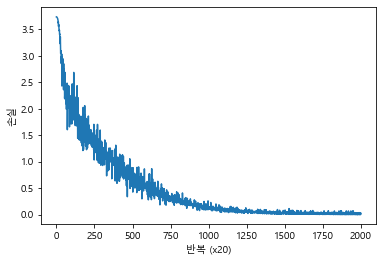

In [5]:
# 시각화
trainer.plot()

In [6]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

    sawyer :  [ 2.3655212 -3.2167914  3.1767507 -3.9642801  1.9737682]
      also :  [-4.275155   1.945428  -3.862957  -4.252205   2.5040584]
   appears :  [ 5.0706263 -1.8172559  1.4748443 -5.369777   4.299002 ]
        in :  [-4.1395745 -2.2567387 -4.722734  -3.5544088 -2.708652 ]
        at :  [ 4.6200585 -4.4973607 -5.39282   -5.3703794 -1.6541277]
     least :  [-3.4406147 -5.019466  -1.010332  -3.2866192 -3.5744376]
     three :  [-4.912314  -6.8654094 -5.844553  -3.7266     4.007806 ]
unfinished :  [-2.445126   -0.48351067  5.228091   -5.2233496   1.2519721 ]
     twain :  [-0.1910819 -4.617234  -6.4558163  6.2558684 -1.6346325]
    works, :  [ 3.132901   3.6790018  3.9547942 -2.5576262 -2.2811162]
           :  [ 3.3425899  1.1842852  2.0549757  8.943336  -3.0407715]
      huck :  [ 3.2176557  1.9132532  3.309325  -2.9997425  1.2954875]
       and :  [-5.4730983   5.3610897  -0.13569187 -3.1367846  -5.337602  ]
       tom :  [ 5.074992   4.898544  -4.8115177 -4.2204843  5.88351

## 예측 및 정확도 평가

In [7]:
h = model.predict(contexts)
print(h)
print(h.shape)  # 

preds = np.argmax(h,1)
t = np.argmax(target,1)
print('target : ',t)
print('predict: ',preds)

accuracy = np.sum(np.equal(preds,t))/len(t)
print('정확도 : ',np.round(accuracy,4))

[[3.74061381e-11 9.99226226e-01 2.89523313e-16 ... 4.41357446e-13
  2.09786953e-18 1.29196261e-13]
 [2.25927697e-11 1.02574723e-17 9.98662494e-01 ... 6.98157697e-13
  1.19226596e-06 5.07498749e-17]
 [8.13911733e-11 1.78029270e-04 3.36987010e-13 ... 1.07717342e-15
  2.03833183e-18 1.83954692e-19]
 ...
 [2.48177255e-09 1.52104124e-06 3.81027161e-11 ... 1.53464801e-04
  5.82327591e-10 7.17093230e-04]
 [2.39060782e-13 6.46125133e-21 9.46929792e-08 ... 9.25196436e-21
  9.99309347e-01 2.81820088e-07]
 [3.12489972e-12 1.53979855e-09 1.26068111e-16 ... 5.50529624e-12
  4.12196462e-08 9.98479491e-01]]
(82, 42)
target :  [ 1  2  3  4  5  6  7  8  9 10 10 10 10 10 10 10 10 11 12 13 14 15 16 17
 18 12 13 19 20 21 10 10 10 10 10 10 10 22 23  6 24 25 26 27 28 10 10 10
 10 10 10 10 10 29 13 19 20 30 31 32 33 34  8 35 10 10 10 10 10 10 10 10
 15 36 37 25 38 39 29 31 40 41]
predict:  [ 1  2  3  4  5  6  7  8 35 10 10 10 10 10 10 10 10 11 12 13 14 15 16 17
 18 12 13 19 20 21 10 10 10 10 10 10 10 22 23  

## [ 과제 2] : SkipGram신경망 모델 구현

In [8]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):  
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)   
        self.out_layer = MatMul(W_out) 
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def predict(self,target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        return s 

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

In [9]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

# text = "The black cat ran so fast that the white mouse could not run away."
# text = 'You say goodbye and I say hello You say goodbye and I say hello.'
text = "Sawyer also appears in at least three unfinished Twain works, \
        Huck and Tom Among the Indians, Schoolhouse Hill and Tom Sawyer's Conspiracy.\
        While all three uncompleted works were posthumously published, \
        only Tom Sawyer's Conspiracy has a complete plot, as Twain abandoned \
        the other two works after finishing only a few chapters."

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
print(target)
print(contexts)
# 중앙의 단어(타깃)으로부터 주변의 여러 단어(맥락)를 예측한다

[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[[[1 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]]]


In [10]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 27 | 시간 0[s] | 손실 7.48
| 에폭 1 |  반복 21 / 27 | 시간 0[s] | 손실 7.47
| 에폭 2 |  반복 1 / 27 | 시간 0[s] | 손실 7.47
| 에폭 2 |  반복 21 / 27 | 시간 0[s] | 손실 7.47
| 에폭 3 |  반복 1 / 27 | 시간 0[s] | 손실 7.47
| 에폭 3 |  반복 21 / 27 | 시간 0[s] | 손실 7.46
| 에폭 4 |  반복 1 / 27 | 시간 0[s] | 손실 7.45
| 에폭 4 |  반복 21 / 27 | 시간 0[s] | 손실 7.44
| 에폭 5 |  반복 1 / 27 | 시간 0[s] | 손실 7.39
| 에폭 5 |  반복 21 / 27 | 시간 0[s] | 손실 7.41
| 에폭 6 |  반복 1 / 27 | 시간 0[s] | 손실 7.35
| 에폭 6 |  반복 21 / 27 | 시간 0[s] | 손실 7.34
| 에폭 7 |  반복 1 / 27 | 시간 0[s] | 손실 7.26
| 에폭 7 |  반복 21 / 27 | 시간 0[s] | 손실 7.30
| 에폭 8 |  반복 1 / 27 | 시간 0[s] | 손실 7.14
| 에폭 8 |  반복 21 / 27 | 시간 0[s] | 손실 7.18
| 에폭 9 |  반복 1 / 27 | 시간 0[s] | 손실 7.01
| 에폭 9 |  반복 21 / 27 | 시간 0[s] | 손실 7.08
| 에폭 10 |  반복 1 / 27 | 시간 0[s] | 손실 6.97
| 에폭 10 |  반복 21 / 27 | 시간 0[s] | 손실 6.94
| 에폭 11 |  반복 1 / 27 | 시간 0[s] | 손실 6.85
| 에폭 11 |  반복 21 / 27 | 시간 0[s] | 손실 6.75
| 에폭 12 |  반복 1 / 27 | 시간 0[s] | 손실 6.97
| 에폭 12 |  반복 21 / 27 | 시간 0[s] | 손실 6.62
| 에폭 13 |  반복 1 / 27 |

| 에폭 99 |  반복 21 / 27 | 시간 1[s] | 손실 3.69
| 에폭 100 |  반복 1 / 27 | 시간 1[s] | 손실 3.58
| 에폭 100 |  반복 21 / 27 | 시간 1[s] | 손실 3.41
| 에폭 101 |  반복 1 / 27 | 시간 1[s] | 손실 4.21
| 에폭 101 |  반복 21 / 27 | 시간 1[s] | 손실 3.51
| 에폭 102 |  반복 1 / 27 | 시간 1[s] | 손실 3.73
| 에폭 102 |  반복 21 / 27 | 시간 1[s] | 손실 3.61
| 에폭 103 |  반복 1 / 27 | 시간 1[s] | 손실 3.59
| 에폭 103 |  반복 21 / 27 | 시간 1[s] | 손실 3.74
| 에폭 104 |  반복 1 / 27 | 시간 1[s] | 손실 3.33
| 에폭 104 |  반복 21 / 27 | 시간 1[s] | 손실 3.67
| 에폭 105 |  반복 1 / 27 | 시간 1[s] | 손실 3.03
| 에폭 105 |  반복 21 / 27 | 시간 1[s] | 손실 3.65
| 에폭 106 |  반복 1 / 27 | 시간 1[s] | 손실 3.44
| 에폭 106 |  반복 21 / 27 | 시간 1[s] | 손실 3.83
| 에폭 107 |  반복 1 / 27 | 시간 1[s] | 손실 3.17
| 에폭 107 |  반복 21 / 27 | 시간 1[s] | 손실 3.47
| 에폭 108 |  반복 1 / 27 | 시간 1[s] | 손실 3.67
| 에폭 108 |  반복 21 / 27 | 시간 1[s] | 손실 3.37
| 에폭 109 |  반복 1 / 27 | 시간 1[s] | 손실 4.06
| 에폭 109 |  반복 21 / 27 | 시간 1[s] | 손실 3.40
| 에폭 110 |  반복 1 / 27 | 시간 1[s] | 손실 4.00
| 에폭 110 |  반복 21 / 27 | 시간 1[s] | 손실 3.28
| 에폭 111 |  반복 1 / 27 |

| 에폭 199 |  반복 1 / 27 | 시간 2[s] | 손실 3.11
| 에폭 199 |  반복 21 / 27 | 시간 2[s] | 손실 2.92
| 에폭 200 |  반복 1 / 27 | 시간 2[s] | 손실 2.46
| 에폭 200 |  반복 21 / 27 | 시간 2[s] | 손실 2.70
| 에폭 201 |  반복 1 / 27 | 시간 2[s] | 손실 2.72
| 에폭 201 |  반복 21 / 27 | 시간 2[s] | 손실 2.75
| 에폭 202 |  반복 1 / 27 | 시간 2[s] | 손실 2.46
| 에폭 202 |  반복 21 / 27 | 시간 2[s] | 손실 2.67
| 에폭 203 |  반복 1 / 27 | 시간 2[s] | 손실 2.69
| 에폭 203 |  반복 21 / 27 | 시간 2[s] | 손실 2.70
| 에폭 204 |  반복 1 / 27 | 시간 2[s] | 손실 3.01
| 에폭 204 |  반복 21 / 27 | 시간 2[s] | 손실 2.76
| 에폭 205 |  반복 1 / 27 | 시간 2[s] | 손실 2.92
| 에폭 205 |  반복 21 / 27 | 시간 2[s] | 손실 2.62
| 에폭 206 |  반복 1 / 27 | 시간 2[s] | 손실 2.92
| 에폭 206 |  반복 21 / 27 | 시간 2[s] | 손실 2.81
| 에폭 207 |  반복 1 / 27 | 시간 2[s] | 손실 2.05
| 에폭 207 |  반복 21 / 27 | 시간 2[s] | 손실 2.84
| 에폭 208 |  반복 1 / 27 | 시간 2[s] | 손실 2.34
| 에폭 208 |  반복 21 / 27 | 시간 2[s] | 손실 2.68
| 에폭 209 |  반복 1 / 27 | 시간 2[s] | 손실 2.64
| 에폭 209 |  반복 21 / 27 | 시간 2[s] | 손실 2.91
| 에폭 210 |  반복 1 / 27 | 시간 2[s] | 손실 1.92
| 에폭 210 |  반복 21 / 27 

| 에폭 295 |  반복 1 / 27 | 시간 3[s] | 손실 2.52
| 에폭 295 |  반복 21 / 27 | 시간 3[s] | 손실 2.28
| 에폭 296 |  반복 1 / 27 | 시간 3[s] | 손실 2.05
| 에폭 296 |  반복 21 / 27 | 시간 3[s] | 손실 2.26
| 에폭 297 |  반복 1 / 27 | 시간 3[s] | 손실 2.49
| 에폭 297 |  반복 21 / 27 | 시간 3[s] | 손실 2.23
| 에폭 298 |  반복 1 / 27 | 시간 3[s] | 손실 2.17
| 에폭 298 |  반복 21 / 27 | 시간 3[s] | 손실 2.14
| 에폭 299 |  반복 1 / 27 | 시간 3[s] | 손실 2.45
| 에폭 299 |  반복 21 / 27 | 시간 3[s] | 손실 2.21
| 에폭 300 |  반복 1 / 27 | 시간 3[s] | 손실 2.43
| 에폭 300 |  반복 21 / 27 | 시간 3[s] | 손실 2.30
| 에폭 301 |  반복 1 / 27 | 시간 3[s] | 손실 1.89
| 에폭 301 |  반복 21 / 27 | 시간 3[s] | 손실 2.36
| 에폭 302 |  반복 1 / 27 | 시간 3[s] | 손실 1.88
| 에폭 302 |  반복 21 / 27 | 시간 3[s] | 손실 2.17
| 에폭 303 |  반복 1 / 27 | 시간 3[s] | 손실 2.40
| 에폭 303 |  반복 21 / 27 | 시간 3[s] | 손실 2.08
| 에폭 304 |  반복 1 / 27 | 시간 3[s] | 손실 2.50
| 에폭 304 |  반복 21 / 27 | 시간 3[s] | 손실 2.17
| 에폭 305 |  반복 1 / 27 | 시간 3[s] | 손실 2.41
| 에폭 305 |  반복 21 / 27 | 시간 3[s] | 손실 2.06
| 에폭 306 |  반복 1 / 27 | 시간 3[s] | 손실 2.67
| 에폭 306 |  반복 21 / 27 

| 에폭 391 |  반복 1 / 27 | 시간 4[s] | 손실 1.88
| 에폭 391 |  반복 21 / 27 | 시간 4[s] | 손실 2.09
| 에폭 392 |  반복 1 / 27 | 시간 4[s] | 손실 1.71
| 에폭 392 |  반복 21 / 27 | 시간 4[s] | 손실 2.07
| 에폭 393 |  반복 1 / 27 | 시간 4[s] | 손실 1.82
| 에폭 393 |  반복 21 / 27 | 시간 4[s] | 손실 1.87
| 에폭 394 |  반복 1 / 27 | 시간 4[s] | 손실 2.23
| 에폭 394 |  반복 21 / 27 | 시간 4[s] | 손실 1.82
| 에폭 395 |  반복 1 / 27 | 시간 4[s] | 손실 2.14
| 에폭 395 |  반복 21 / 27 | 시간 4[s] | 손실 1.98
| 에폭 396 |  반복 1 / 27 | 시간 4[s] | 손실 2.13
| 에폭 396 |  반복 21 / 27 | 시간 4[s] | 손실 1.86
| 에폭 397 |  반복 1 / 27 | 시간 4[s] | 손실 2.48
| 에폭 397 |  반복 21 / 27 | 시간 4[s] | 손실 1.93
| 에폭 398 |  반복 1 / 27 | 시간 4[s] | 손실 1.96
| 에폭 398 |  반복 21 / 27 | 시간 4[s] | 손실 1.93
| 에폭 399 |  반복 1 / 27 | 시간 4[s] | 손실 1.99
| 에폭 399 |  반복 21 / 27 | 시간 4[s] | 손실 1.99
| 에폭 400 |  반복 1 / 27 | 시간 4[s] | 손실 2.04
| 에폭 400 |  반복 21 / 27 | 시간 4[s] | 손실 1.95
| 에폭 401 |  반복 1 / 27 | 시간 4[s] | 손실 2.31
| 에폭 401 |  반복 21 / 27 | 시간 4[s] | 손실 1.76
| 에폭 402 |  반복 1 / 27 | 시간 4[s] | 손실 2.12
| 에폭 402 |  반복 21 / 27 

| 에폭 491 |  반복 1 / 27 | 시간 5[s] | 손실 1.76
| 에폭 491 |  반복 21 / 27 | 시간 5[s] | 손실 1.90
| 에폭 492 |  반복 1 / 27 | 시간 5[s] | 손실 1.64
| 에폭 492 |  반복 21 / 27 | 시간 5[s] | 손실 1.92
| 에폭 493 |  반복 1 / 27 | 시간 5[s] | 손실 1.80
| 에폭 493 |  반복 21 / 27 | 시간 5[s] | 손실 1.74
| 에폭 494 |  반복 1 / 27 | 시간 5[s] | 손실 2.13
| 에폭 494 |  반복 21 / 27 | 시간 5[s] | 손실 1.84
| 에폭 495 |  반복 1 / 27 | 시간 5[s] | 손실 1.96
| 에폭 495 |  반복 21 / 27 | 시간 5[s] | 손실 1.92
| 에폭 496 |  반복 1 / 27 | 시간 5[s] | 손실 1.40
| 에폭 496 |  반복 21 / 27 | 시간 5[s] | 손실 1.84
| 에폭 497 |  반복 1 / 27 | 시간 5[s] | 손실 2.01
| 에폭 497 |  반복 21 / 27 | 시간 5[s] | 손실 1.80
| 에폭 498 |  반복 1 / 27 | 시간 5[s] | 손실 2.06
| 에폭 498 |  반복 21 / 27 | 시간 5[s] | 손실 1.92
| 에폭 499 |  반복 1 / 27 | 시간 5[s] | 손실 1.72
| 에폭 499 |  반복 21 / 27 | 시간 5[s] | 손실 1.95
| 에폭 500 |  반복 1 / 27 | 시간 5[s] | 손실 1.43
| 에폭 500 |  반복 21 / 27 | 시간 5[s] | 손실 1.83
| 에폭 501 |  반복 1 / 27 | 시간 5[s] | 손실 1.84
| 에폭 501 |  반복 21 / 27 | 시간 5[s] | 손실 1.92
| 에폭 502 |  반복 1 / 27 | 시간 5[s] | 손실 1.71
| 에폭 502 |  반복 21 / 27 

| 에폭 588 |  반복 1 / 27 | 시간 6[s] | 손실 2.16
| 에폭 588 |  반복 21 / 27 | 시간 6[s] | 손실 1.62
| 에폭 589 |  반복 1 / 27 | 시간 6[s] | 손실 2.24
| 에폭 589 |  반복 21 / 27 | 시간 6[s] | 손실 1.64
| 에폭 590 |  반복 1 / 27 | 시간 6[s] | 손실 1.74
| 에폭 590 |  반복 21 / 27 | 시간 6[s] | 손실 1.82
| 에폭 591 |  반복 1 / 27 | 시간 6[s] | 손실 1.97
| 에폭 591 |  반복 21 / 27 | 시간 6[s] | 손실 1.75
| 에폭 592 |  반복 1 / 27 | 시간 6[s] | 손실 1.58
| 에폭 592 |  반복 21 / 27 | 시간 6[s] | 손실 1.83
| 에폭 593 |  반복 1 / 27 | 시간 6[s] | 손실 1.51
| 에폭 593 |  반복 21 / 27 | 시간 6[s] | 손실 1.84
| 에폭 594 |  반복 1 / 27 | 시간 6[s] | 손실 1.58
| 에폭 594 |  반복 21 / 27 | 시간 6[s] | 손실 1.61
| 에폭 595 |  반복 1 / 27 | 시간 6[s] | 손실 2.22
| 에폭 595 |  반복 21 / 27 | 시간 6[s] | 손실 1.79
| 에폭 596 |  반복 1 / 27 | 시간 6[s] | 손실 1.61
| 에폭 596 |  반복 21 / 27 | 시간 6[s] | 손실 1.79
| 에폭 597 |  반복 1 / 27 | 시간 6[s] | 손실 1.79
| 에폭 597 |  반복 21 / 27 | 시간 7[s] | 손실 1.68
| 에폭 598 |  반복 1 / 27 | 시간 7[s] | 손실 1.80
| 에폭 598 |  반복 21 / 27 | 시간 7[s] | 손실 1.80
| 에폭 599 |  반복 1 / 27 | 시간 7[s] | 손실 1.75
| 에폭 599 |  반복 21 / 27 

| 에폭 684 |  반복 1 / 27 | 시간 8[s] | 손실 1.67
| 에폭 684 |  반복 21 / 27 | 시간 8[s] | 손실 1.73
| 에폭 685 |  반복 1 / 27 | 시간 8[s] | 손실 1.60
| 에폭 685 |  반복 21 / 27 | 시간 8[s] | 손실 1.51
| 에폭 686 |  반복 1 / 27 | 시간 8[s] | 손실 2.56
| 에폭 686 |  반복 21 / 27 | 시간 8[s] | 손실 1.82
| 에폭 687 |  반복 1 / 27 | 시간 8[s] | 손실 1.42
| 에폭 687 |  반복 21 / 27 | 시간 8[s] | 손실 1.68
| 에폭 688 |  반복 1 / 27 | 시간 8[s] | 손실 1.74
| 에폭 688 |  반복 21 / 27 | 시간 8[s] | 손실 1.77
| 에폭 689 |  반복 1 / 27 | 시간 8[s] | 손실 1.63
| 에폭 689 |  반복 21 / 27 | 시간 8[s] | 손실 1.70
| 에폭 690 |  반복 1 / 27 | 시간 8[s] | 손실 1.70
| 에폭 690 |  반복 21 / 27 | 시간 8[s] | 손실 1.68
| 에폭 691 |  반복 1 / 27 | 시간 8[s] | 손실 1.56
| 에폭 691 |  반복 21 / 27 | 시간 8[s] | 손실 1.68
| 에폭 692 |  반복 1 / 27 | 시간 8[s] | 손실 2.03
| 에폭 692 |  반복 21 / 27 | 시간 8[s] | 손실 1.66
| 에폭 693 |  반복 1 / 27 | 시간 8[s] | 손실 1.74
| 에폭 693 |  반복 21 / 27 | 시간 8[s] | 손실 1.64
| 에폭 694 |  반복 1 / 27 | 시간 8[s] | 손실 2.40
| 에폭 694 |  반복 21 / 27 | 시간 8[s] | 손실 1.62
| 에폭 695 |  반복 1 / 27 | 시간 8[s] | 손실 1.75
| 에폭 695 |  반복 21 / 27 

| 에폭 786 |  반복 21 / 27 | 시간 9[s] | 손실 1.82
| 에폭 787 |  반복 1 / 27 | 시간 9[s] | 손실 1.33
| 에폭 787 |  반복 21 / 27 | 시간 9[s] | 손실 1.84
| 에폭 788 |  반복 1 / 27 | 시간 9[s] | 손실 1.57
| 에폭 788 |  반복 21 / 27 | 시간 9[s] | 손실 1.62
| 에폭 789 |  반복 1 / 27 | 시간 9[s] | 손실 1.77
| 에폭 789 |  반복 21 / 27 | 시간 9[s] | 손실 1.60
| 에폭 790 |  반복 1 / 27 | 시간 9[s] | 손실 2.03
| 에폭 790 |  반복 21 / 27 | 시간 9[s] | 손실 1.68
| 에폭 791 |  반복 1 / 27 | 시간 9[s] | 손실 1.64
| 에폭 791 |  반복 21 / 27 | 시간 9[s] | 손실 1.82
| 에폭 792 |  반복 1 / 27 | 시간 9[s] | 손실 1.28
| 에폭 792 |  반복 21 / 27 | 시간 9[s] | 손실 1.61
| 에폭 793 |  반복 1 / 27 | 시간 9[s] | 손실 1.93
| 에폭 793 |  반복 21 / 27 | 시간 9[s] | 손실 1.83
| 에폭 794 |  반복 1 / 27 | 시간 9[s] | 손실 1.57
| 에폭 794 |  반복 21 / 27 | 시간 9[s] | 손실 1.63
| 에폭 795 |  반복 1 / 27 | 시간 9[s] | 손실 1.77
| 에폭 795 |  반복 21 / 27 | 시간 9[s] | 손실 1.73
| 에폭 796 |  반복 1 / 27 | 시간 9[s] | 손실 1.54
| 에폭 796 |  반복 21 / 27 | 시간 9[s] | 손실 1.76
| 에폭 797 |  반복 1 / 27 | 시간 9[s] | 손실 1.69
| 에폭 797 |  반복 21 / 27 | 시간 9[s] | 손실 1.64
| 에폭 798 |  반복 1 / 27 

| 에폭 890 |  반복 1 / 27 | 시간 10[s] | 손실 1.38
| 에폭 890 |  반복 21 / 27 | 시간 10[s] | 손실 1.71
| 에폭 891 |  반복 1 / 27 | 시간 10[s] | 손실 1.63
| 에폭 891 |  반복 21 / 27 | 시간 10[s] | 손실 1.63
| 에폭 892 |  반복 1 / 27 | 시간 10[s] | 손실 1.48
| 에폭 892 |  반복 21 / 27 | 시간 10[s] | 손실 1.73
| 에폭 893 |  반복 1 / 27 | 시간 10[s] | 손실 1.41
| 에폭 893 |  반복 21 / 27 | 시간 10[s] | 손실 1.46
| 에폭 894 |  반복 1 / 27 | 시간 10[s] | 손실 2.42
| 에폭 894 |  반복 21 / 27 | 시간 10[s] | 손실 1.68
| 에폭 895 |  반복 1 / 27 | 시간 10[s] | 손실 1.60
| 에폭 895 |  반복 21 / 27 | 시간 10[s] | 손실 1.63
| 에폭 896 |  반복 1 / 27 | 시간 10[s] | 손실 2.01
| 에폭 896 |  반복 21 / 27 | 시간 10[s] | 손실 1.73
| 에폭 897 |  반복 1 / 27 | 시간 10[s] | 손실 1.38
| 에폭 897 |  반복 21 / 27 | 시간 10[s] | 손실 1.77
| 에폭 898 |  반복 1 / 27 | 시간 10[s] | 손실 1.43
| 에폭 898 |  반복 21 / 27 | 시간 10[s] | 손실 1.60
| 에폭 899 |  반복 1 / 27 | 시간 10[s] | 손실 1.93
| 에폭 899 |  반복 21 / 27 | 시간 10[s] | 손실 1.64
| 에폭 900 |  반복 1 / 27 | 시간 10[s] | 손실 1.83
| 에폭 900 |  반복 21 / 27 | 시간 10[s] | 손실 1.70
| 에폭 901 |  반복 1 / 27 | 시간 10[s] | 손실 1.55


| 에폭 984 |  반복 1 / 27 | 시간 11[s] | 손실 1.78
| 에폭 984 |  반복 21 / 27 | 시간 11[s] | 손실 1.66
| 에폭 985 |  반복 1 / 27 | 시간 11[s] | 손실 1.37
| 에폭 985 |  반복 21 / 27 | 시간 11[s] | 손실 1.74
| 에폭 986 |  반복 1 / 27 | 시간 11[s] | 손실 1.81
| 에폭 986 |  반복 21 / 27 | 시간 11[s] | 손실 1.82
| 에폭 987 |  반복 1 / 27 | 시간 11[s] | 손실 1.04
| 에폭 987 |  반복 21 / 27 | 시간 11[s] | 손실 1.52
| 에폭 988 |  반복 1 / 27 | 시간 11[s] | 손실 1.99
| 에폭 988 |  반복 21 / 27 | 시간 11[s] | 손실 1.69
| 에폭 989 |  반복 1 / 27 | 시간 11[s] | 손실 1.62
| 에폭 989 |  반복 21 / 27 | 시간 11[s] | 손실 1.77
| 에폭 990 |  반복 1 / 27 | 시간 11[s] | 손실 1.33
| 에폭 990 |  반복 21 / 27 | 시간 11[s] | 손실 1.67
| 에폭 991 |  반복 1 / 27 | 시간 11[s] | 손실 1.83
| 에폭 991 |  반복 21 / 27 | 시간 11[s] | 손실 1.67
| 에폭 992 |  반복 1 / 27 | 시간 11[s] | 손실 1.50
| 에폭 992 |  반복 21 / 27 | 시간 11[s] | 손실 1.68
| 에폭 993 |  반복 1 / 27 | 시간 11[s] | 손실 1.57
| 에폭 993 |  반복 21 / 27 | 시간 11[s] | 손실 1.60
| 에폭 994 |  반복 1 / 27 | 시간 11[s] | 손실 1.86
| 에폭 994 |  반복 21 / 27 | 시간 11[s] | 손실 1.65
| 에폭 995 |  반복 1 / 27 | 시간 11[s] | 손실 1.88


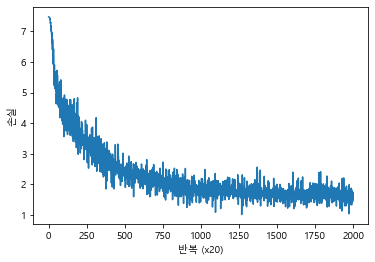

In [11]:
trainer.plot()

In [12]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])    

    sawyer :  [ 0.01290636 -0.01551285 -0.00337508 -0.0119346   0.00159007]
      also :  [-4.3653665   0.61032575 -3.9251497   4.066446    0.5192398 ]
   appears :  [ 2.3406894 -1.3551431 -4.0701323  3.2267654  4.091413 ]
        in :  [-2.3116548 -3.4711268 -3.233719   3.3080873  1.2853636]
        at :  [ 3.96444   -4.2764497 -0.6852592  3.6960561  1.8913506]
     least :  [-2.445899  -4.3757334 -2.360709   0.2221091  2.8955028]
     three :  [ 0.7809991  -2.9929886   1.2388629   5.7811093  -0.32446954]
unfinished :  [-4.045693  -1.7340126  1.3781153 -0.4815587  3.3506951]
     twain :  [-3.301666   -0.61440885  3.2083237   3.070051   -0.24718595]
    works, :  [-4.371271    2.7496095   2.237368   -1.266806    0.94045395]
           :  [-0.9815173   0.7280294   1.6041425  -0.31712735 -1.2173269 ]
      huck :  [-1.843871   2.8633773  4.218021  -4.355719   1.4441456]
       and :  [-0.8912598 -1.8233664 -0.9185317 -1.6936685 -3.5248199]
       tom :  [ 1.6875452  2.2787244  1.71115  

## 예측 및 정확도 평가

In [13]:
def get_correct(num):
    h = model.predict(target[num,:])  
    pred0 = np.argmax(h,0)
    h1 = h
    h[pred0] = 0
    pred1 = np.argmax(h1,0)
    c0 = np.argmax(contexts[num,0,:],0) 
    c1 = np.argmax(contexts[num,1,:],0) 
    print('context : ',c0,c1)
    print('predict : ',pred0,pred1)
    print('-'*50)
    correct = 0
    if (c0==pred0)|(c0==pred1):
        correct +=1
    if (c1==pred0)|(c1==pred1):
        correct +=1
    return correct    

acc = 0
for k in range(target.shape[0]) : 
    correct = get_correct(k)
    acc += correct

accuracy = acc/target.shape[0]/2 
print('정확도 : ',np.round(accuracy,4)) 

context :  0 2
predict :  0 2
--------------------------------------------------
context :  1 3
predict :  1 3
--------------------------------------------------
context :  2 4
predict :  4 2
--------------------------------------------------
context :  3 5
predict :  3 5
--------------------------------------------------
context :  4 6
predict :  4 6
--------------------------------------------------
context :  5 7
predict :  24 23
--------------------------------------------------
context :  6 8
predict :  8 6
--------------------------------------------------
context :  7 9
predict :  35 34
--------------------------------------------------
context :  8 10
predict :  10 8
--------------------------------------------------
context :  9 10
predict :  10 35
--------------------------------------------------
context :  10 10
predict :  10 35
--------------------------------------------------
context :  10 10
predict :  10 35
--------------------------------------------------
context :  

In [14]:
print(contexts)
contexts.shape

[[[1 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]]]


(82, 2, 42)

In [15]:
print(contexts[0,:,:])
contexts.shape

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]]


(82, 2, 42)

In [16]:
print(target[0,:])
target.shape

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


(82, 42)